# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 2


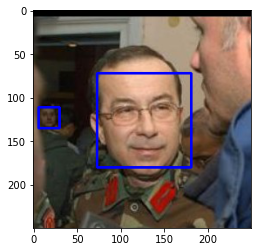

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm, trange
import time

start_time = time.time()

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

human_tp = 0
dog_fp = 0

for i in trange(100):
    human_tp += int(face_detector(human_files_short[i]) == True)
    dog_fp += int(face_detector(dog_files_short[i]) == True)

print("What percentage of the first 100 images in human_files have a detected human face? {:.0f}%"
      .format(human_tp))
print("What percentage of the first 100 images in dog_files have a detected human face? {:.0f}%"
      .format(dog_fp))

print("Runtime: %.2f seconds" % (time.time() - start_time))

100%|██████████| 100/100 [00:08<00:00, 12.25it/s]

What percentage of the first 100 images in human_files have a detected human face? 99%
What percentage of the first 100 images in dog_files have a detected human face? 13%
Runtime: 8.18 seconds


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

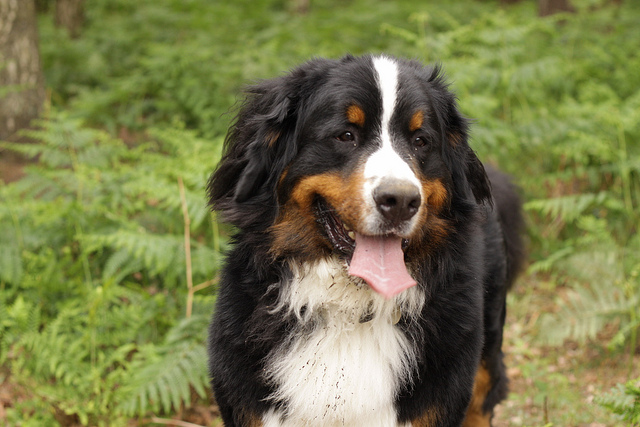

dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01651.jpg 239


In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    image = Image.open(img_path)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = transform(image)
    img = img.unsqueeze(0)
    img = img.cuda()
    out = VGG16.forward(img)
    _, pred = torch.max(out, 1)
    
    return pred.item()

# test functionality
img = dog_files[4156]
index = VGG16_predict(img)
display(Image.open(img))
print(img, index)

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    index = VGG16_predict(img_path)
    return True if 151 <= index <= 268 else False

# test functionality
dog = dog_files[0]
human = human_files[0]
print(dog_detector(dog))
print(dog_detector(human))

True
False


### Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
start_time = time.time()

human_tp = 0
dog_fp = 0

for i in trange(100):
    human_tp += int(dog_detector(human_files_short[i]) == True)
    dog_fp += int(dog_detector(dog_files_short[i]) == True)

print("What percentage of the images in human_files_short have a detected dog? {:.0f}%"
      .format(human_tp))
print("What percentage of the images in dog_files_short have a detected dog? {:.0f}%"
      .format(dog_fp))

print("Runtime: %.2f seconds" % (time.time() - start_time))

100%|██████████| 100/100 [00:02<00:00, 42.10it/s]

What percentage of the images in human_files_short have a detected dog? 2%
What percentage of the images in dog_files_short have a detected dog? 100%
Runtime: 2.38 seconds


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
import torchvision.transforms as transforms
from torchvision import datasets

num_workers = 0
batch_size = 20

transform_train = transforms.Compose([transforms.RandomRotation(5),
                                      transforms.Resize((256, 256)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
                                     ])

transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
                               ])

train_data = datasets.ImageFolder(root='dogImages/train', transform=transform_train)
valid_data = datasets.ImageFolder(root='dogImages/valid', transform=transform)
test_data = datasets.ImageFolder(root='dogImages/test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_scratch = {}
loaders_scratch["train"] = train_loader
loaders_scratch["valid"] = valid_loader
loaders_scratch["test"] = test_loader

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
The code randomly rotates, resizes and flips the input images for the training dataset. Randomizing training data helps to prevent overfitting. Also, I am normalizing the pixel values. Normalization is used to keep the network weights near zero which makes the backpropagation process more stable during training. For the validation and test datasets, I choose to only resize and normalize the input images. I use an input size of 256-by-256 pixels for all datasets, because the provided input images vary in size. Keeping a static input size will help me to validate the classification performance throughout the complete dataset. The reason why I am *not introducing* any randomness during the validation and test steps is that we want to check how well the neural network is able to generalize on unseen data.

### Visualize a Batch of Training Data

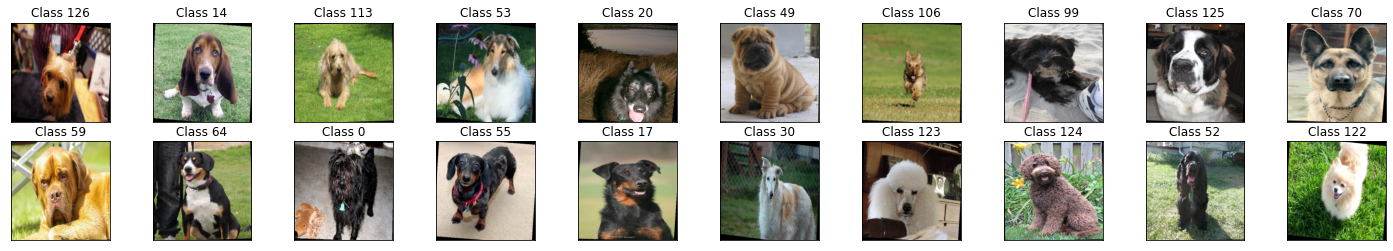

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_dataset(loader):
    # obtain one batch of training images
    data_iter = iter(loader)
    images, labels = data_iter.next()
    # convert images to numpy for display
    images = images.numpy()
    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 4))
    # display 20 images
    for idx in np.arange(20):
        ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
        img = images[idx]
        img = img / 2 + 0.5 # un-normalize
        img = np.clip(img, 0, 1) # clip inputs to interval edges
        plt.imshow(np.transpose(img, (1, 2, 0)))
        ax.set_title("Class " + str(labels[idx].item()))

plot_dataset(loaders_scratch["train"])

### Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 133)         # make a prediction between 133 classes of dog breeds
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 256 * 8 * 8)            # input image size is 8x8 with a depth of 265
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

# test forward pass
data_iter = iter(loaders_scratch["train"])
images, labels = data_iter.next()
images = images.cuda()
model_scratch(images)

tensor([[ 0.0121, -0.0241, -0.0312,  ...,  0.0351,  0.0138,  0.0339],
        [ 0.0052, -0.0216, -0.0405,  ...,  0.0407,  0.0057,  0.0347],
        [ 0.0150, -0.0250, -0.0346,  ...,  0.0327,  0.0005,  0.0351],
        ...,
        [ 0.0160, -0.0170, -0.0415,  ...,  0.0294,  0.0094,  0.0354],
        [ 0.0105, -0.0197, -0.0369,  ...,  0.0388,  0.0063,  0.0344],
        [ 0.0106, -0.0136, -0.0429,  ...,  0.0361, -0.0012,  0.0270]],
       device='cuda:0', grad_fn=<AddmmBackward>)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I choose a CNN architecture which is very similar to what I have been introduced to during the Udacity online course. This way, I am better able to compare the classification performances among all neural networks I have self-constructed so far. I have chosen five convolutional layers in total, because after analyzing the image datasets, I feel like the complexity of the images is quite high. The images strongly vary in size, the dogs themselves are depicted in different sizes, some dogs have their head tilted, some dog breeds look very identical or have different color of fur, etc. But I hope that the more hidden layers I include in the network for the feature detection, the more complex patterns this network will be able to detect. The classifier in the fully-connected network part will receive a 20x256x8x8 input tensor. In general, my concern is overfitting based on the explanation concerning the dataset complexity. If my model fails to achieve the 10% accuracy requirement, then I will take a closer look at how the VGG16 architecture is designed and derive  appropriate corrections. Maybe increasing the dropout probability from 0.25 to 0.5 helps to decrease the overfitting effect.

### Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### select loss function
criterion_scratch = nn.CrossEntropyLoss()

### select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize start time
    start_time = time.time()
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders["train"]):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
            
        ######################    
        # validate the model #
        ######################
        with torch.no_grad():
            model.eval()
            for batch_idx, (data, target) in enumerate(loaders["valid"]):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                # update the average validation loss
                output = model(data)
                loss = criterion(output, target)
                valid_loss += loss.item() * data.size(0)
        
        # calculate average losses
        train_loss = train_loss/len(loaders["train"].dataset)
        valid_loss = valid_loss/len(loaders["valid"].dataset)
            
        # print training/validation statistics every five epochs
        if epoch % 5 == 0:
            print("Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f}".format(epoch, train_loss, valid_loss))
            print("Runtime: %.2f minutes" % ((time.time() - start_time) / 60.0))
        
        # save model
        if valid_loss <= valid_loss_min:
            print("Validation loss decreased from {:.4f} to {:.4f}, saving model.".format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # print total runtime
    print("Total Runtime: %.2f minutes" % ((time.time() - start_time) / 60.0))
            
    # return trained model
    return model

In [16]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

Validation loss decreased from inf to 4.8716, saving model.
Validation loss decreased from 4.8716 to 4.7011, saving model.
Validation loss decreased from 4.7011 to 4.5634, saving model.
Validation loss decreased from 4.5634 to 4.4783, saving model.
Epoch: 5 	Training Loss: 4.3938 	Validation Loss: 4.3060
Runtime: 7.20 minutes
Validation loss decreased from 4.4783 to 4.3060, saving model.
Validation loss decreased from 4.3060 to 4.1352, saving model.
Validation loss decreased from 4.1352 to 4.0130, saving model.
Validation loss decreased from 4.0130 to 3.9227, saving model.
Validation loss decreased from 3.9227 to 3.8853, saving model.
Epoch: 10 	Training Loss: 3.4542 	Validation Loss: 3.7778
Runtime: 14.46 minutes
Validation loss decreased from 3.8853 to 3.7778, saving model.
Validation loss decreased from 3.7778 to 3.7372, saving model.
Epoch: 15 	Training Loss: 2.5735 	Validation Loss: 3.8112
Runtime: 21.84 minutes
Epoch: 20 	Training Loss: 1.8201 	Validation Loss: 4.1490
Runtime: 29

In [17]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}'.format(test_loss))
    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

In [19]:
# test the model  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.816927
Test Accuracy: 15% (126/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
num_workers = 0
batch_size = 20

transform_train = transforms.Compose([transforms.Resize((256, 256)),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                     ])

transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                               ])

train_data = datasets.ImageFolder(root='dogImages/train', transform=transform_train)
valid_data = datasets.ImageFolder(root='dogImages/valid', transform=transform)
test_data = datasets.ImageFolder(root='dogImages/test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_transfer = {}
loaders_transfer["train"] = train_loader
loaders_transfer["valid"] = valid_loader
loaders_transfer["test"] = test_loader

for loader in loaders_transfer:
    print(loaders_transfer[loader].dataset)

Dataset ImageFolder
    Number of datapoints: 6680
    Root Location: dogImages/train
    Transforms (if any): Compose(
                             Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None
Dataset ImageFolder
    Number of datapoints: 835
    Root Location: dogImages/valid
    Transforms (if any): Compose(
                             Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None
Dataset ImageFolder
    Number of datapoints: 836
    Root Location: dogImage

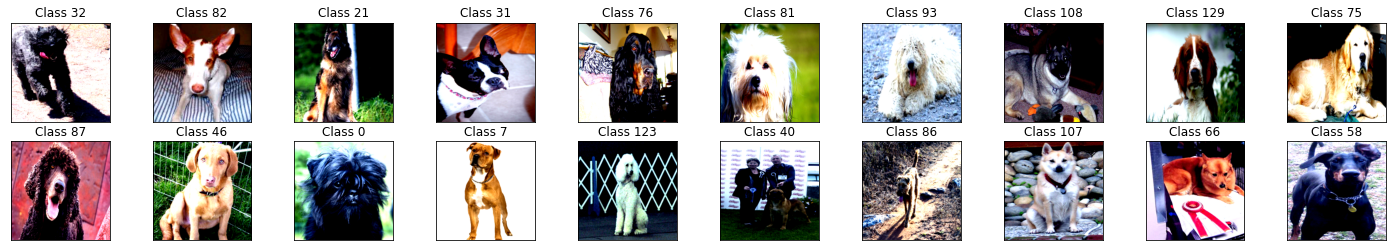

In [21]:
plot_dataset(loaders_transfer["train"])

### Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.resnet101(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

print(model_transfer.fc)
model_transfer.fc = nn.Linear(model_transfer.fc.in_features, 133) # make a prediction between 133 classes of dog breeds
print(model_transfer.fc)

for param in model_transfer.fc.parameters():
    print(param.requires_grad) # check if the last couple of parameters are not frozen

if use_cuda:
    model_transfer = model_transfer.cuda()

Linear(in_features=2048, out_features=1000, bias=True)
Linear(in_features=2048, out_features=133, bias=True)
True
True


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I use a model which is known to perform well on the image classification task. ResNet is both a popular and recent architecture model. I use ResNet101, because I feel like with a 101-layer architecture, I am able to exceed the 60% accuracy requirement mentioned below.

### Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
# train the model
model_transfer = train(30, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Validation loss decreased from inf to 0.7099, saving model.
Validation loss decreased from 0.7099 to 0.6104, saving model.
Validation loss decreased from 0.6104 to 0.5476, saving model.
Epoch: 5 	Training Loss: 0.2982 	Validation Loss: 0.5334
Runtime: 7.88 minutes
Validation loss decreased from 0.5476 to 0.5334, saving model.
Epoch: 10 	Training Loss: 0.1952 	Validation Loss: 0.6146
Runtime: 15.78 minutes
Epoch: 15 	Training Loss: 0.1299 	Validation Loss: 0.6018
Runtime: 23.66 minutes
Epoch: 20 	Training Loss: 0.1191 	Validation Loss: 0.7293
Runtime: 31.54 minutes
Epoch: 25 	Training Loss: 0.0879 	Validation Loss: 0.6738
Runtime: 39.44 minutes
Epoch: 30 	Training Loss: 0.1009 	Validation Loss: 0.7618
Runtime: 47.34 minutes
Total Runtime: 47.34 minutes


In [25]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [26]:
# test the model
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.542975
Test Accuracy: 85% (714/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)